In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

2026-01-21 20:12:02.423004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-21 20:12:02.431121: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-21 20:12:02.434903: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

2026-01-21 20:12:02.777774: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT: INTERNAL: Cannot dlopen all TensorRT libraries: FAILED_PRECONDITION: Could not load dynamic library 'libnvinfer.so.10.8.0'; dlerror: libnvinfer.so.10.8.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aispark/Project/Object_Detect/.venv/lib/python3.12/site-packages/cv2/../../lib64:


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# load model
model = tf.keras.models.load_model('models/object_detection.keras')
print('model loaded sucessfully')

I0000 00:00:1769026323.472063  285452 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1769026323.501860  285452 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1769026323.504673  285452 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1769026323.508084  285452 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

model loaded sucessfully


In [4]:
path = 'Data/images/N207.jpeg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output

In [5]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 423
Width of the image = 541


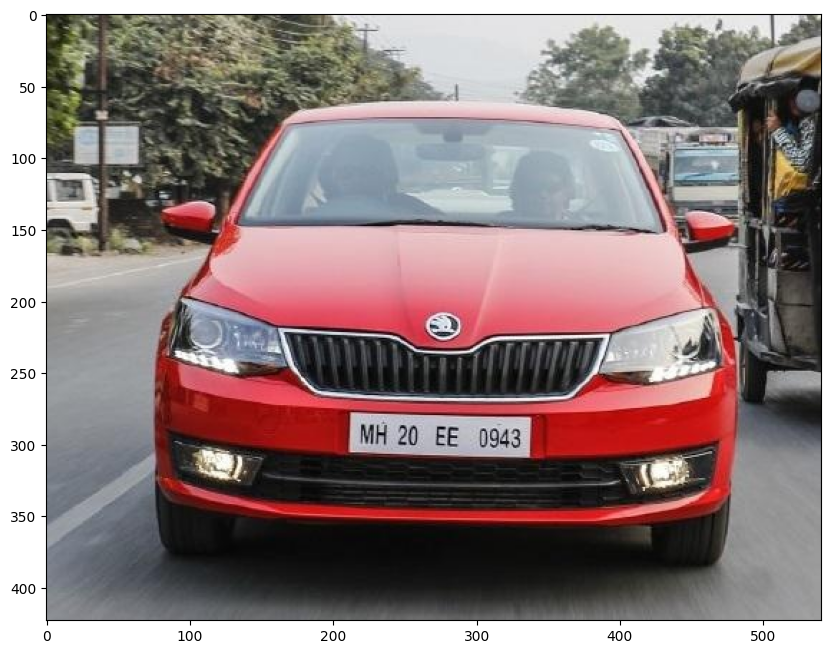

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
# make predictions
coords = model.predict(test_arr)
coords

I0000 00:00:1769026330.869355  308083 service.cc:146] XLA service 0xf0fc840032d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769026330.869375  308083 service.cc:154]   StreamExecutor device (0): NVIDIA GB10, Compute Capability 12.1
2026-01-21 20:12:10.875273: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-21 20:12:10.919670: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 91800
2026-01-21 20:12:11.241829: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 457.14MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2026-01-21 20:12:11.241856: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


I0000 00:00:1769026331.451189  308083 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


array([[0.38157544, 0.5500178 , 0.6663827 , 0.73952115]], dtype=float32)

In [10]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[206.43231055, 297.55961579, 281.87986958, 312.81744468]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[206, 297, 281, 312]], dtype=int32)

(206, 281) (297, 312)


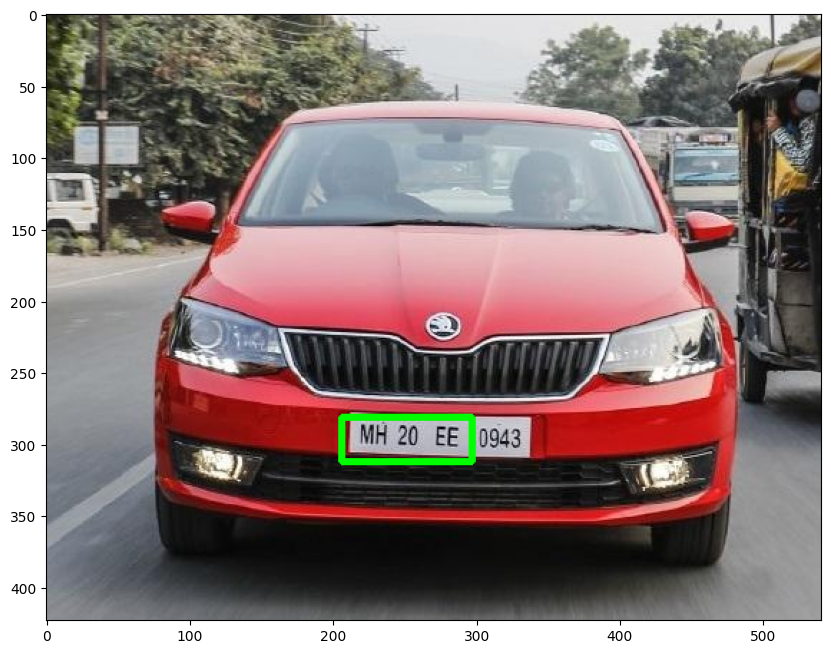

In [12]:
# draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [13]:
# create pipeline
path = 'Data/images/N207.jpeg'
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
(206, 281) (297, 312)


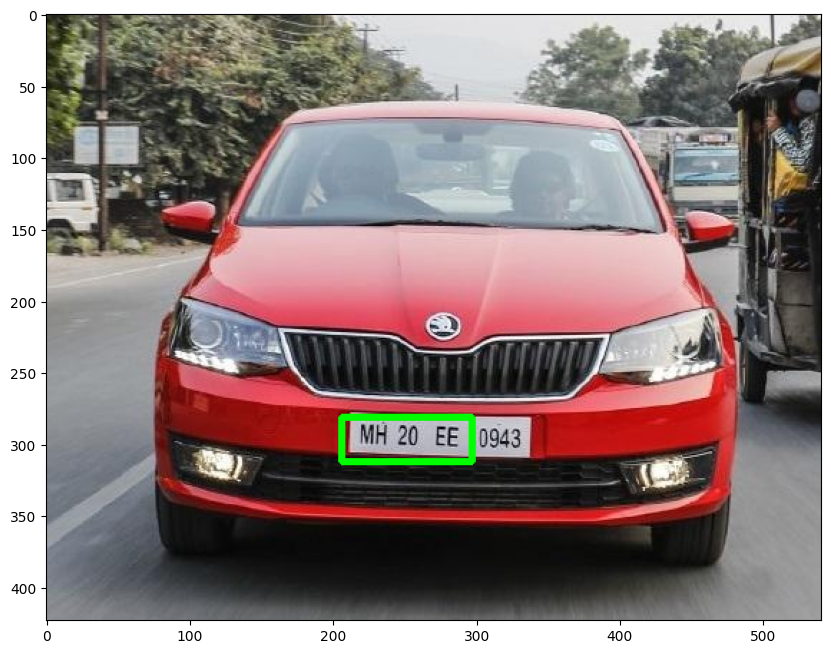

In [14]:
path = 'Data/images/N207.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR

In [15]:
import pytesseract as pt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
(206, 281) (297, 312)


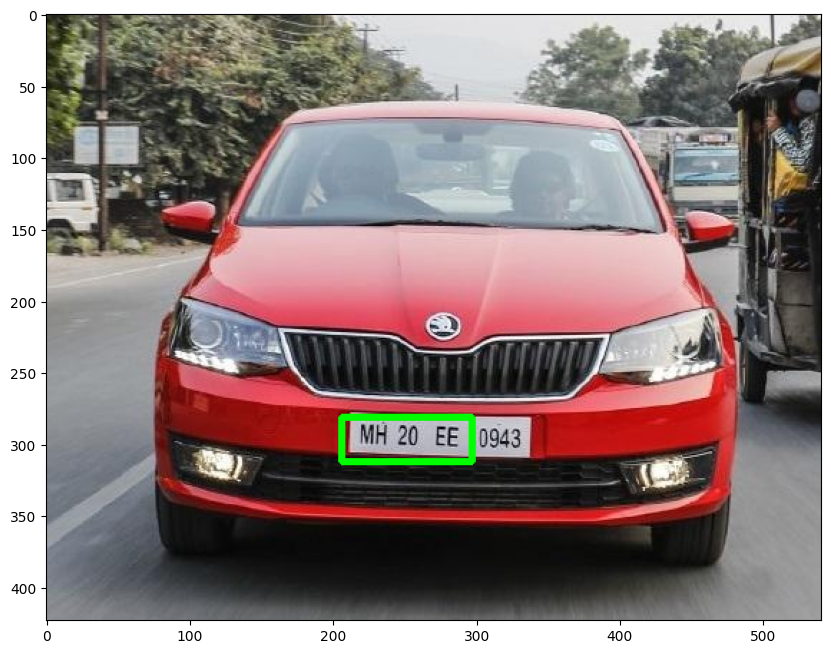

In [16]:
path = 'Data/images/N207.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [17]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

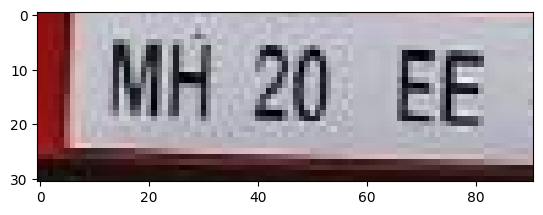

In [18]:
plt.imshow(roi)
plt.show()

In [19]:
# extract text from image
text = pt.image_to_string(roi)
print(text)

y MH 20 EE

